--- Basic File Info ---
Users shape: (10000, 14)
Jobs shape: (500, 15)
Interactions shape: (24999, 3)

--- User Data ---
         experience  salary_expectation  Python_proficiency
count  10000.000000        10000.000000        10000.000000
mean      12.132200        95528.048100            4.992503
std        7.261639        31897.436264            2.897465
min        0.000000        40014.000000            0.002176
25%        6.000000        67577.000000            2.476638
50%       12.000000        96020.500000            5.009376
75%       18.000000       122779.750000            7.488209
max       24.000000       149994.000000            9.999868


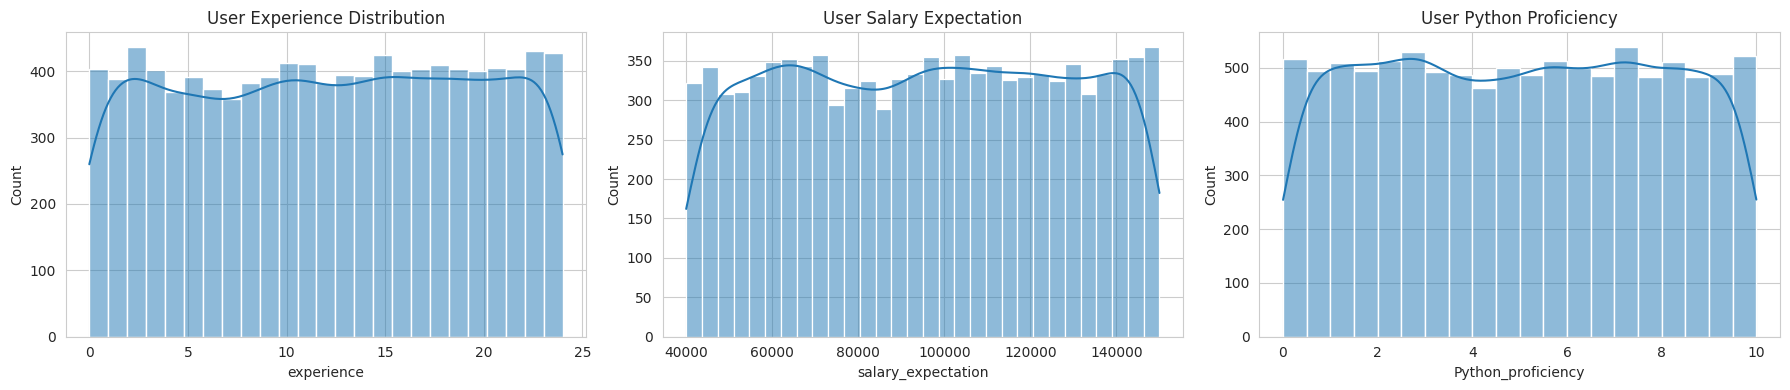


--- Job Data ---
       experience_required     salary_min     salary_max  Python_expected
count           500.000000     500.000000     500.000000       500.000000
mean              7.108000   74095.774000  104059.974000         4.874838
std               4.425325   24997.437979   26482.147383         2.891675
min               0.000000   30294.000000   45266.000000         0.026549
25%               3.000000   50862.250000   83329.000000         2.320837
50%               7.000000   75998.500000  103249.000000         4.787141
75%              11.000000   94146.250000  124245.000000         7.446391
max              14.000000  119746.000000  167234.000000         9.999896


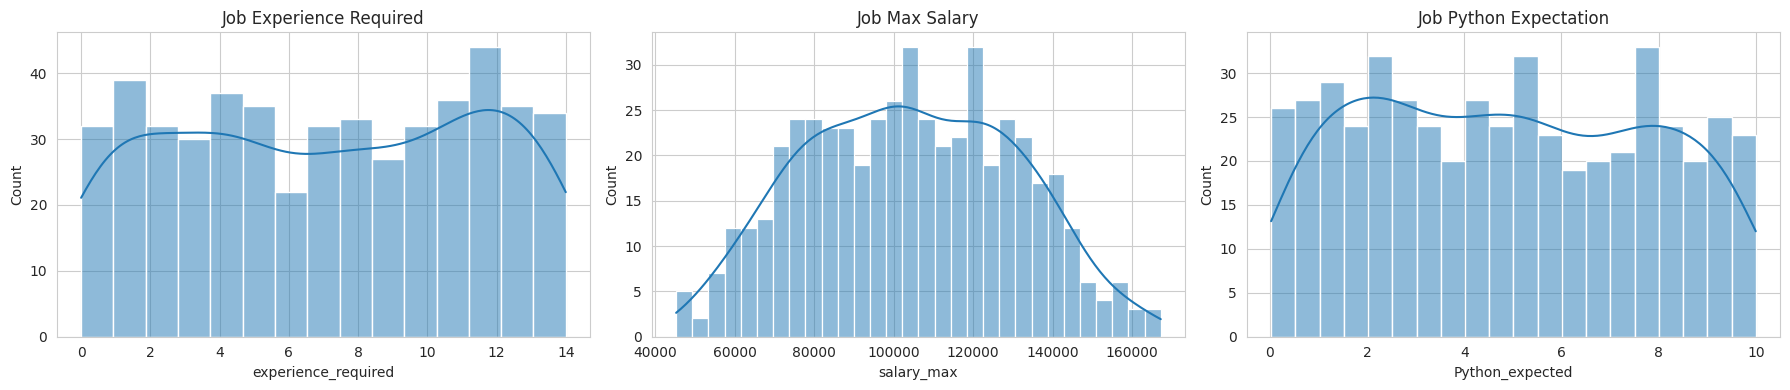


--- Interaction Data ---
Shortlist Balance:
shortlisted
0    59.9984
1    40.0016
Name: proportion, dtype: float64

Interactions per User (Stats):
count    10000.000000
mean         2.499900
std          1.232539
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: count, dtype: float64

Applicants per Job (Stats):
count    500.000000
mean      49.998000
std       15.367574
min       20.000000
25%       39.000000
50%       47.000000
75%       58.000000
max      131.000000
Name: count, dtype: float64

--- Merged Data Analysis ---
Plotting distributions for 'shortlisted' vs. 'not shortlisted'...


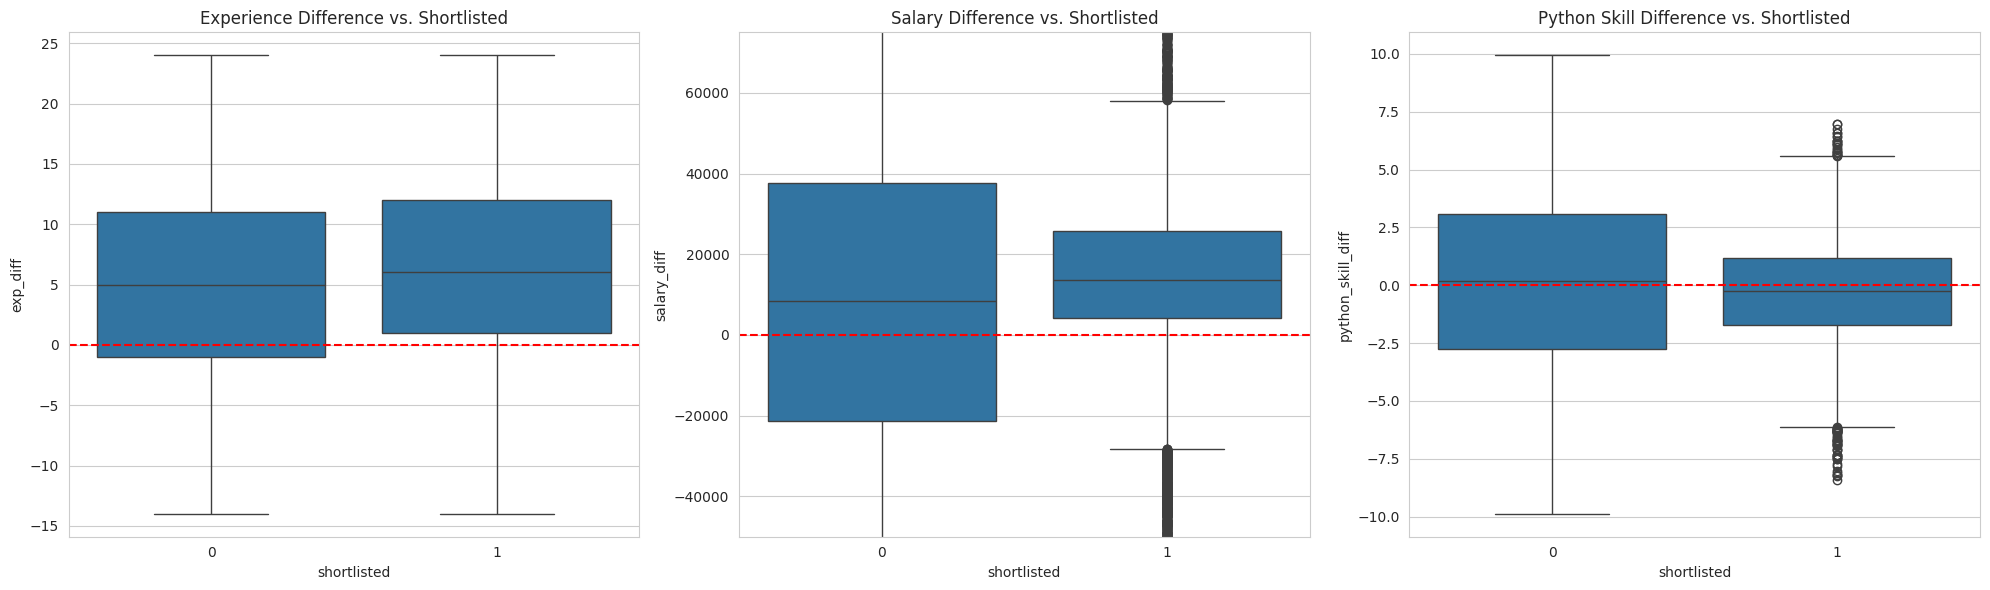


--- EDA Check ---
In the final boxplots, you should see a clear difference between 0 and 1.
  - 'exp_diff': The box for '1' should be significantly higher than '0' (ideally above the red line).
  - 'salary_diff': The box for '1' should also be higher (meaning salary_max > salary_expectation).
  - 'python_skill_diff': The box for '1' should be centered higher than '0'.

If you see this, your dataset is high-quality and your model has clear patterns to learn.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# --- 1. Load Datasets ---
try:
    users_df = pd.read_csv('users.csv')
    jobs_df = pd.read_csv('jobs.csv')
    interactions_df = pd.read_csv('interactions.csv')
except FileNotFoundError:
    print("Make sure all three CSV files (users.csv, jobs.csv, interactions.csv) are in the same directory.")
    exit()

print("--- Basic File Info ---")
print(f"Users shape: {users_df.shape}")
print(f"Jobs shape: {jobs_df.shape}")
print(f"Interactions shape: {interactions_df.shape}\n")

# --- 2. EDA on users.csv ---
print("--- User Data ---")
print(users_df[['experience', 'salary_expectation', 'Python_proficiency']].describe())

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.histplot(users_df['experience'], bins=25, kde=True)
plt.title('User Experience Distribution')
plt.subplot(1, 3, 2)
sns.histplot(users_df['salary_expectation'], bins=30, kde=True)
plt.title('User Salary Expectation')
plt.subplot(1, 3, 3)
sns.histplot(users_df['Python_proficiency'], bins=20, kde=True)
plt.title('User Python Proficiency')
plt.tight_layout()
plt.show()

# --- 3. EDA on jobs.csv ---
print("\n--- Job Data ---")
print(jobs_df[['experience_required', 'salary_min', 'salary_max', 'Python_expected']].describe())

plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.histplot(jobs_df['experience_required'], bins=15, kde=True)
plt.title('Job Experience Required')
plt.subplot(1, 3, 2)
sns.histplot(jobs_df['salary_max'], bins=30, kde=True)
plt.title('Job Max Salary')
plt.subplot(1, 3, 3)
sns.histplot(jobs_df['Python_expected'], bins=20, kde=True)
plt.title('Job Python Expectation')
plt.tight_layout()
plt.show()

# --- 4. EDA on interactions.csv ---
print("\n--- Interaction Data ---")
# Check for class balance
shortlist_balance = interactions_df['shortlisted'].value_counts(normalize=True) * 100
print(f"Shortlist Balance:\n{shortlist_balance}\n")

# Check interactions per user
user_interaction_counts = interactions_df['user_id'].value_counts()
print("Interactions per User (Stats):")
print(user_interaction_counts.describe())

# Check applicants per job
job_interaction_counts = interactions_df['job_id'].value_counts()
print("\nApplicants per Job (Stats):")
print(job_interaction_counts.describe())

# --- 5. Merged Data - The Most Important EDA ---
# This checks if the 'shortlisted' label is correlated with feature matches
print("\n--- Merged Data Analysis ---")

# Merge all three dataframes
full_df = interactions_df.merge(users_df, on='user_id')
full_df = full_df.merge(jobs_df, on='job_id')

# Create "diff" features to see how good the match is
full_df['exp_diff'] = full_df['experience'] - full_df['experience_required']
full_df['salary_diff'] = full_df['salary_max'] - full_df['salary_expectation']
full_df['python_skill_diff'] = full_df['Python_proficiency'] - full_df['Python_expected']

# Now, let's visualize the difference between shortlisted and not shortlisted
print("Plotting distributions for 'shortlisted' vs. 'not shortlisted'...")

plt.figure(figsize=(20, 6))
# Compare Experience Difference
plt.subplot(1, 3, 1)
sns.boxplot(x='shortlisted', y='exp_diff', data=full_df)
plt.title('Experience Difference vs. Shortlisted')
plt.axhline(0, color='r', linestyle='--') # Add a line at 0

# Compare Salary Difference
plt.subplot(1, 3, 2)
sns.boxplot(x='shortlisted', y='salary_diff', data=full_df)
plt.title('Salary Difference vs. Shortlisted')
plt.axhline(0, color='r', linestyle='--')
plt.ylim(-50000, 75000) # Zoom in to see the effect

# Compare Skill Difference
plt.subplot(1, 3, 3)
sns.boxplot(x='shortlisted', y='python_skill_diff', data=full_df)
plt.title('Python Skill Difference vs. Shortlisted')
plt.axhline(0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# --- What to look for in the boxplots: ---
print("\n--- EDA Check ---")
print("In the final boxplots, you should see a clear difference between 0 and 1.")
print("  - 'exp_diff': The box for '1' should be significantly higher than '0' (ideally above the red line).")
print("  - 'salary_diff': The box for '1' should also be higher (meaning salary_max > salary_expectation).")
print("  - 'python_skill_diff': The box for '1' should be centered higher than '0'.")
print("\nIf you see this, your dataset is high-quality and your model has clear patterns to learn.")